# 方策のロバスト性

---

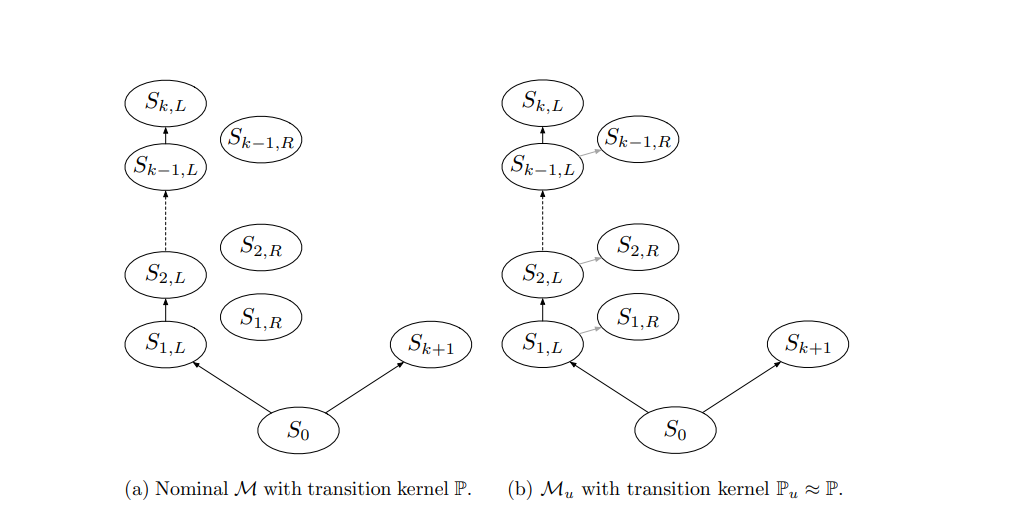

まずは(a)の環境を考えます。

行動はそれぞれの状態で{左:0,右:1}が選択でき、右の行動を選択すると、-1のコスト、左の行動は0です。

そして、一度右の行動を選択した場合、その場所から動くことができず、その場所に停滞します。

一方で、$S_0$から左を選ぶと、矢印の通りに動いて行きます。

最後の$S_{k-1,L}$から$S_{k,L}$が行動するときに唯一、コストが$-(1+\epsilon) \gamma^{-k+1}$が発生します。ただし、$\epsilon \ll 1$です。


このMDPを考えると、左を選べば、最低限右に行くよりも、コストが小さくなるので、左を選ぶことが最適解となります。

なので、(a)での最適方策$\pi^*$は左ということになります。

---

ここで、(a)の環境に似ている(b)の環境を用意します。

(b)の環境の遷移確率は$\mathbb{P}_u\left(S_{m+1, L} \mid S_{m, L}\right)=p$で、$\mathbb{P}_u\left(S_{m, R} \mid S_{m, L}\right)=1-p$です。

ここで、$p \in(0,1)$で、pは1に限りなく近いとします。

そして、コストは左に行けば行くほど、$-(1+\epsilon) p^{k-1}$が発生します。

右にいった場合の$-1$のコストのままです。

これは、kが大きくなればなるほど、コストは0になってしまいますね。

これを考えると、環境(b)での最適方策は右を選ぶということになります。

ここで、(a)の最適方策を環境(b)に適用してしまうと、最適な方策ではないですね。

---

(a)での右を選ぶ方策は最適な方策ではないですが、$\epsilon$-最適な方策です。

そして、少し、環境を変えた(b)でも最適な方策になっているので、この方策のほうがロバストという視点では、

よりの望ましい考えですね。

**つまり要約すると、ある環境に特化している最適な方策を考えるのでなく、少しの環境の変化にも対応した、方策を選んだほうが良いということです。**





---

ここからコードに入っていきます。

今回はホライゾンの長さを50で仮定します。


In [22]:
import numpy as np
from typing import NamedTuple,Optional
import matplotlib.pyplot as plt

def Env_a(k:int,action:int,epsilon:float,gamma:float):
    if action == 0:
        return -(1+epsilon) * gamma **(-k+1)
    
    else:
        return -1
    

def Env_b(k:int,action:int,epsilon:float,gamma:float,p:float):
    if action == 0:
        for _ in range(k):
            s = np.random.choice([0,1],p=[1-p,p])
            if s == 0:
                return -1
        return -(1+epsilon) * p **(k-1)
    
    else:
        return -1




---

(a)での最適方策は左ですね。

一度、(b)で左のアクションを選択してみましょう。



In [27]:
reward = Env_b(50,0,0.01,0.9,0.999)

print(reward)



-0.9616793638428445


今回はわかりやすいように遷移確率を極端にしましたが、環境(b)で右を選べば、コスト-1だったので、最適ではなくなっていますね。

ホライゾンが多くなるほど、この差は顕著になっていきます。

